На этот раз данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
```
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
```
Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.
Note: данные в задании покрывают другой временной период, имена тоже другие.

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [139]:
import pandas as pd
import os

In [140]:
os.getcwd()

'/home/ag/MyProjects/Karpov_Py_course/4/MiniProject'

In [141]:
path = '/home/ag/MyProjects/Karpov_Py_course/4/MiniProject/data/'

In [12]:
os.listdir(path)

['2020-12-03',
 '2020-12-04',
 '2020-12-09',
 '2020-12-07',
 '2020-12-05',
 '2020-12-08',
 '2020-12-06']

In [68]:
# создаем общий df для будущих объединенных данных

df = pd.DataFrame()

# os.walk посещает все папки ниже по иерархии и читает данные
# распаковываем полученный кортеж сразу в три переменные
# итерируемся по всем файлам доступным по всем путям внутри папки data

for current_path, dirs, files in os.walk(path):
    for file in files:
        
        # Собираем полный путь к файлу
        data_path = f'{current_path}/{file}'

        # Читаем файл в промежуточный df         
        temp_df = pd.read_csv(data_path)
        
        # Извлекаем имя и дату покупок из названия папок по пути к файлу
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Добавляем колокни с датой и именем в промежуточный df
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Добавляем данные из промежуточного в общий df через pd.concat
        df = pd.concat((df, temp_df))

In [69]:
# Удаяем лишнюю колонку и так сохраняем df
df.drop(columns=['Unnamed: 0'], inplace=True) 

In [70]:
# Сбрасываем колонку с индексом и сохраняем df
df.reset_index(drop=True, inplace=True)

In [73]:
# Сумма по кол-ву покупок в колонки quantity
df.quantity.sum()

480

Второй способ сделать то же самое, с помощью сторонних библиотек:

In [142]:
from pathlib import Path  # более поздняя в сравнении с os библиотека

In [143]:
path = '/home/ag/MyProjects/Karpov_Py_course/4/MiniProject/data/'

In [144]:
path = Path('/home/ag/MyProjects/Karpov_Py_course/4/MiniProject/data/')

In [82]:
path # это теперь объект пути, а не сам путь

PosixPath('/home/ag/MyProjects/Karpov_Py_course/4/MiniProject/data')

In [106]:
# Простой способ проитерироваться по объекту, получаем объект-генератор
miniproject_path = Path(path)
miniproject_path

PosixPath('/home/ag/MyProjects/Karpov_Py_course/4/MiniProject/data')

In [107]:
# метод принимает строку-шаблон для отбора: 
# ** - любое кол-во уровней,  / - уровнем выше, * - любой .csv файл 
miniproject_path.glob('**/*.csv')

<generator object Path.glob at 0x7fa7edd47b30>

In [108]:
df = pd.DataFrame()

for csv_path in miniproject_path.glob('**/*.csv'):
    temp_df = pd.read_csv(csv_path)
    
    df = pd.concat((df, temp_df))

In [109]:
df

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4
...,...,...,...
5,5,50,5
0,0,56,4
1,1,97,3
2,2,79,3


In [80]:
dir(path)  # доступные методы и атрибуты у объекта path

['__bytes__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_relative_to',
 'is_re

In [145]:
# Второе решение аналогично предыдущему, кроме более быстрой работы с путями

# создаем общий df для будущих объединенных данных

df = pd.DataFrame()

# os.walk посещает все папки ниже по иерархии и читает данные
# распаковываем полученный кортеж сразу в три переменные
# итерируемся по всем файлам доступным по всем путям внутри папки data

for current_path, dirs, files in os.walk(path):
    for file in files:

        # Собираем путь к файлу через "/" (для конкотенации в Path)
        part_path = Path(current_path)
        data_path = part_path / file
        
        # Читаем файл в промежуточный df         
        temp_df = pd.read_csv(data_path)
        
        # Извлекаем имя и дату покупок из объекта data_path методом parts
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # Добавляем колокни с датой и именем в промежуточный df
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Добавляем данные из промежуточного в общий df через pd.concat
        df = pd.concat((df, temp_df))

In [146]:
# Удаяем лишнюю колонку и так сохраняем df
df.drop(columns=['Unnamed: 0'], inplace=True)

In [147]:
# Сбрасываем колонку с индексом и сохраняем df
df.reset_index(drop=True, inplace=True)

In [148]:
# Сумма по кол-ву покупок в колонки quantity
df.quantity.sum()

480

In [149]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,50,5,2020-12-08,Rostislav_Petrov
157,56,4,2020-12-06,Vasiliy_Fedorov
158,97,3,2020-12-06,Vasiliy_Fedorov
159,79,3,2020-12-06,Vasiliy_Fedorov


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [150]:
df.groupby('name') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [159]:
import seaborn as sns

In [160]:
products_sells = df \
                    .groupby('product_id', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('quantity', ascending=False) \
                    .head(10)

In [171]:
products_sells.query('product_id == 56')  # 18 штук

,product_id,quantity
42,56,18


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

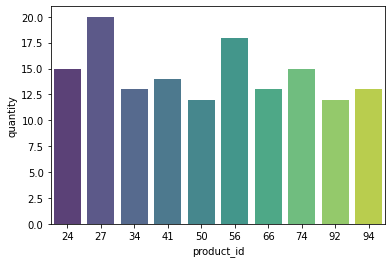

In [172]:
sns.barplot(data=products_sells, x='product_id', y='quantity', palette='viridis', alpha=0.9)

Визуализируйте продажи по дням.

<AxesSubplot:xlabel='date'>

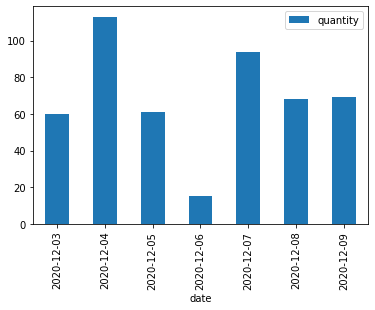

In [175]:
df.groupby('date') \
    .agg({'quantity': 'sum'}) \
    .plot(kind='bar')

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [181]:
# Группируем, чтобы в каждой группе только один пользователь и один товар
# считаем кол-во разных дат в каждой группе и запросом извлекаем где > 1

df.groupby(['name', 'product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
